# POKEMON STATS ANALYSIS
 phases: Business Understanding, Data Understanding, Data preparation, Modelling, Evaluation, Conclusions

## Business Understanding

In [351]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [352]:
df =  pd.read_csv('Pokemon.csv')  #read the csv file and save it into a variable
df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case
df.head(n=10)          

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [353]:
df[df['LEGENDARY']==True].head(5)  #Showing the legendary pokemons

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [354]:
df = df.set_index('NAME') #change and set the index to the name attribute
df.head(n=5)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preparation

In [355]:
## The index of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega"  
df.index = df.index.str.replace(".*(?=Mega)", "", regex=True)
df.index = df.index.str.replace(".*(?=Primal)", "", regex=True)
df.head(5)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [356]:
df=df.drop(['#'],axis=1) #drop the columns with axis=1;axis=0 is for rows

In [357]:
print('The columns of the dataset are: ',df.columns) #show the dataframe columns
print('The shape of the dataframe is: ',df.shape)  

The columns of the dataset are:  Index(['TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
The shape of the dataframe is:  (800, 11)


In [358]:
#some values in TYPE2 are empty and thus they have to be filled or deleted
df['TYPE 2'].fillna(df['TYPE 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type

In [359]:
print(df.loc['Gyarados']) #retrieves complete row data from index with value Bulbasaur

TYPE 1         Water
TYPE 2        Flying
TOTAL            540
HP                95
ATTACK           125
DEFENSE           79
SP. ATK           60
SP. DEF          100
SPEED             81
GENERATION         1
LEGENDARY      False
Name: Gyarados, dtype: object


In [360]:
#filtering pokemons using logical operators
df[((df['TYPE 1']=='Grass') | (df['TYPE 1']=='Water')) & ((df['TYPE 2']=='Ice') | (df['TYPE 2']=='Ghost'))].head(5)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Dewgong,Water,Ice,475,90,70,80,70,95,70,1,False
Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
Snover,Grass,Ice,334,60,62,50,62,60,40,4,False
Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False


In [361]:
print("Max SPEED:", df['SPEED'].max(), "-",df['SPEED'].idxmax())  #returns the pokemon with highest HP
print("Min SPEDD:", df['SPEED'].min(), "-",df['SPEED'].idxmin())

Max SPEED: 180 - DeoxysSpeed Forme
Min SPEDD: 5 - Shuckle


In [362]:
df.sort_values('TOTAL',ascending=False).head(3)  #this arranges the pokemons in the descendng order of the Totals.
#sort_values() is used for sorting and ascending=False is making it in descending order

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [363]:
print('The unique  pokemon types are',df['TYPE 1'].unique()) #shows all the unique types in column
print('The number of unique types are',df['TYPE 1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [364]:
print("Type 1 counts:", '\n' ,df['TYPE 1'].value_counts(), '\n',"Type 2 counts:",'\n',df['TYPE 2'].value_counts())#count different types of pokemons
df.groupby(['TYPE 1']).size()  #same as above
print("Total:", (df['TYPE 1']=='Bug').sum()) #counts for a single value

Type 1 counts: 
 Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE 1, dtype: int64 
 Type 2 counts: 
 Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: TYPE 2, dtype: int64
Total: 69


In [365]:
df_summary = df.describe() #summary of the pokemon dataframe
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Modelling

Attack distribution across all the generations

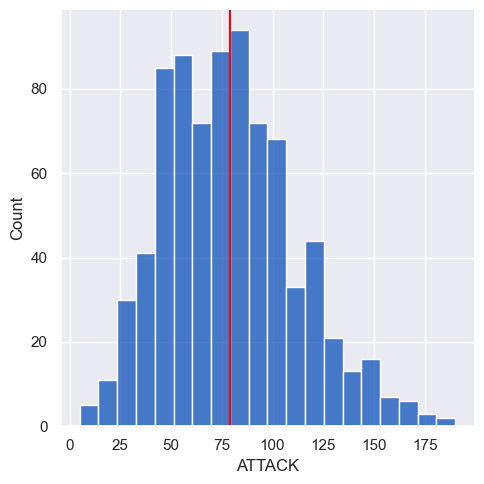

The average value for the ATTACK stat is: 79


In [366]:
# Seaborn options
sns.set_theme(style="darkgrid")

sns.displot(data = df["ATTACK"], color="#0F52BA")

# average line
plt.axvline(x=df['ATTACK'].mean(), color='red')
plt.show()

mean_attack = df['ATTACK'].mean()
print("The average value for the ATTACK stat is:", round(mean_attack))

Speed distribution across all the generations

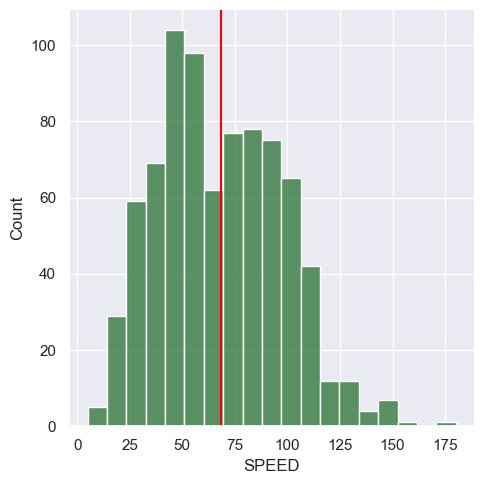

The average value for the SPEED stat is: 68


In [367]:
sns.displot(data = df["SPEED"], color='#287233')

# average line
plt.axvline(x=df['SPEED'].mean(), color='red')
plt.show()
mean_speed = df['SPEED'].mean()
print("The average value for the SPEED stat is:", round(mean_speed))


Two types comparison in two stats

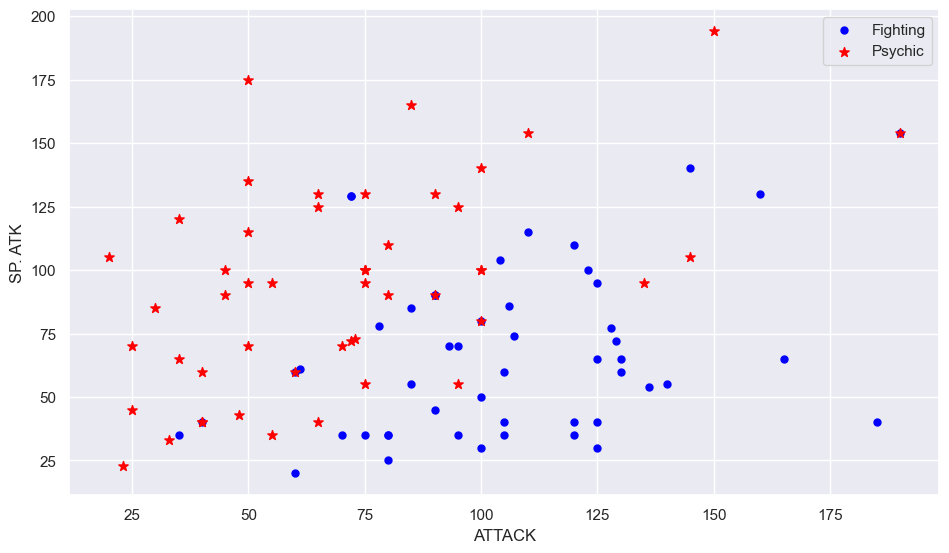

In [368]:
# Selection of both types
type_1, type_2 = "Fighting", "Psychic"

# Selection of stats in uppercase
stat_1, stat_2 = "ATTACK", "SP. ATK"

# all pokemons for type 1 
df_1 = df[(df['TYPE 1']==type_1) | (df['TYPE 2']==type_1)]  
# all pokemons for type 2
df_2 = df[(df['TYPE 1']==type_2) | (df['TYPE 2']==type_2)] 


# plot configurations
plt.scatter(df_1[stat_1].head(50), df_1[stat_2].head(50), 
            color="Blue", label=type_1, s=25)

plt.scatter(df_2[stat_1].head(50), df_2[stat_2].head(50), 
            color="Red", label=type_2, marker='*', s=50)

plt.xlabel(stat_1)
plt.ylabel(stat_2)
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(10,6) #set the size for the figure
plt.show()


Strongest pokemons by types

In [369]:
strong=df.sort_values(by='TOTAL', ascending=False) #sorting the rows in descending order
strong.drop_duplicates(subset=['TYPE 1'], keep='first') #since the rows are now sorted in descending oredr
#thus we take the first row for every new type of pokemon i.e the table will check TYPE 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Primal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Distribution of various pokemon types

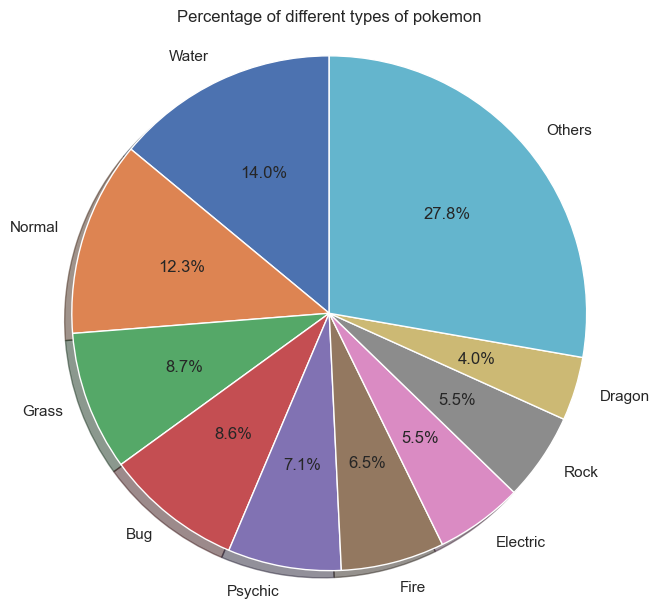

In [370]:
# Count the values for the sizes for the plot
values_type_1 = df['TYPE 1'].value_counts()
labels = []
sizes = []

for k, v in values_type_1.items():
    labels.append(k)
    sizes.append(v)

# Number of types that will appear (max 18)
n = 9
if n >= 0 & n <= 18:
    l = labels[:n]
    s = sizes[:n]
    s2 = sizes[n:]
    
    total_others = 0
    for v in s2:
        total_others += v
 
    if total_others != 0:
        l.append("Others")
        s.append(total_others)

plt.pie(s, labels=l,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Percentage of different types of pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()